In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , confusion_matrix

In [2]:
data = pd.read_csv("D:\\Users\\Jeewanshu Gaur\\Downloads\\archive (18)\\framingham.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
data.isna().mean()*100

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

In [6]:
imputer = SimpleImputer(strategy = 'mean')
data['glucose'] = imputer.fit_transform(data[['glucose']])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [8]:
data = data.dropna()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3987 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3987 non-null   int64  
 1   age              3987 non-null   int64  
 2   education        3987 non-null   float64
 3   currentSmoker    3987 non-null   int64  
 4   cigsPerDay       3987 non-null   float64
 5   BPMeds           3987 non-null   float64
 6   prevalentStroke  3987 non-null   int64  
 7   prevalentHyp     3987 non-null   int64  
 8   diabetes         3987 non-null   int64  
 9   totChol          3987 non-null   float64
 10  sysBP            3987 non-null   float64
 11  diaBP            3987 non-null   float64
 12  BMI              3987 non-null   float64
 13  heartRate        3987 non-null   float64
 14  glucose          3987 non-null   float64
 15  TenYearCHD       3987 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.5 KB


<Axes: >

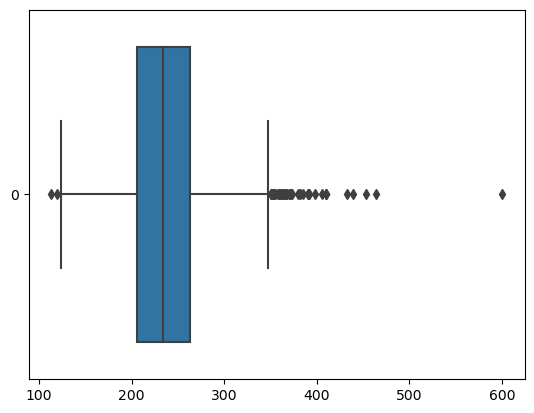

In [10]:
sns.boxplot(data['totChol'] , orient = 'h')

<Axes: >

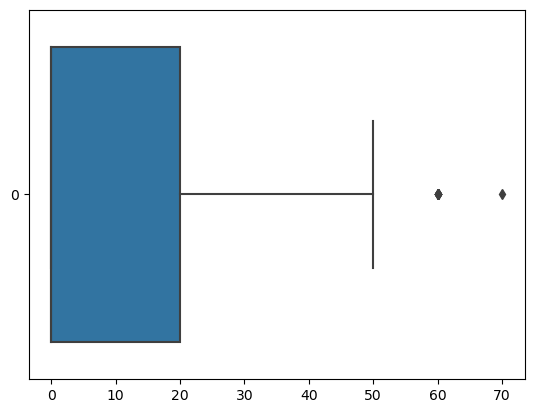

In [11]:
sns.boxplot(data['cigsPerDay'] , orient = 'h')

<Axes: >

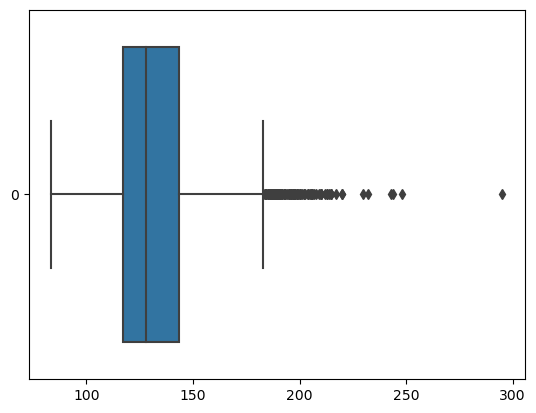

In [12]:
sns.boxplot(data['sysBP'] , orient = 'h')

<Axes: >

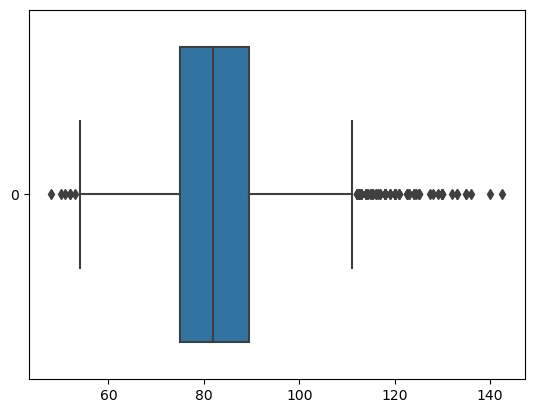

In [13]:
sns.boxplot(data['diaBP'] , orient = 'h')

<Axes: >

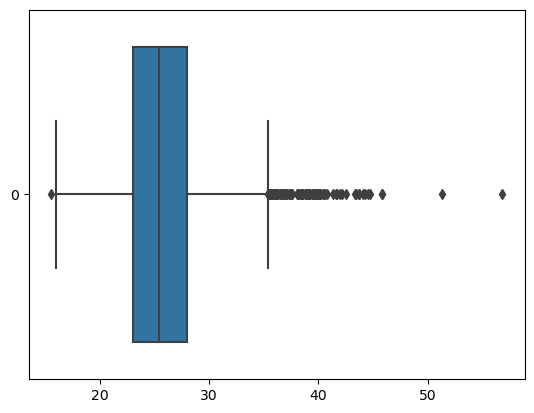

In [14]:
sns.boxplot(data['BMI'] , orient = 'h')

<Axes: >

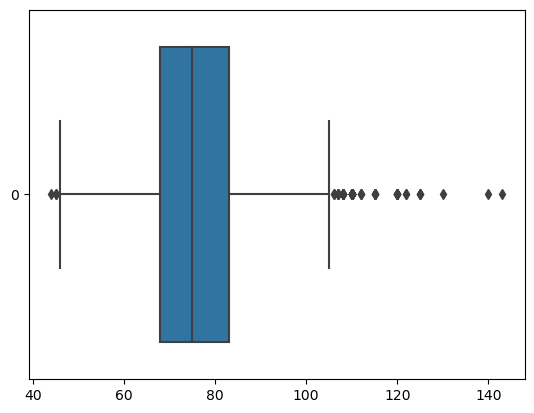

In [15]:
sns.boxplot(data['heartRate'] , orient = 'h')

<Axes: >

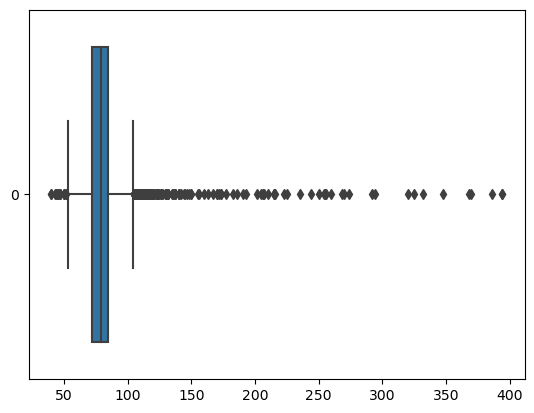

In [16]:
sns.boxplot(data['glucose'] , orient = 'h')

C:\Users\Jeewanshu Gaur\AppData\Local\Temp\ipykernel_5092\3409289242.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['totChol'])
D:\Users\Jeewanshu Gaur\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jeewanshu Gaur\AppData\Local\Temp\ipykernel_5092\3409289242.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level functi

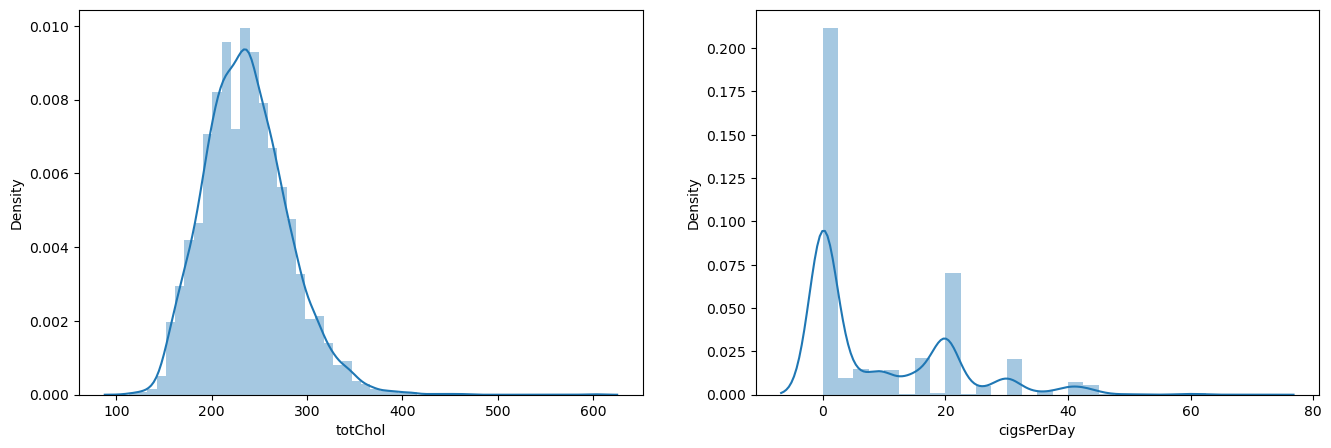

In [17]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(data['totChol'])

plt.subplot(1,2,2)
sns.distplot(data['cigsPerDay'])
plt.show()

C:\Users\Jeewanshu Gaur\AppData\Local\Temp\ipykernel_5092\3595232212.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sysBP'])
D:\Users\Jeewanshu Gaur\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jeewanshu Gaur\AppData\Local\Temp\ipykernel_5092\3595232212.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function

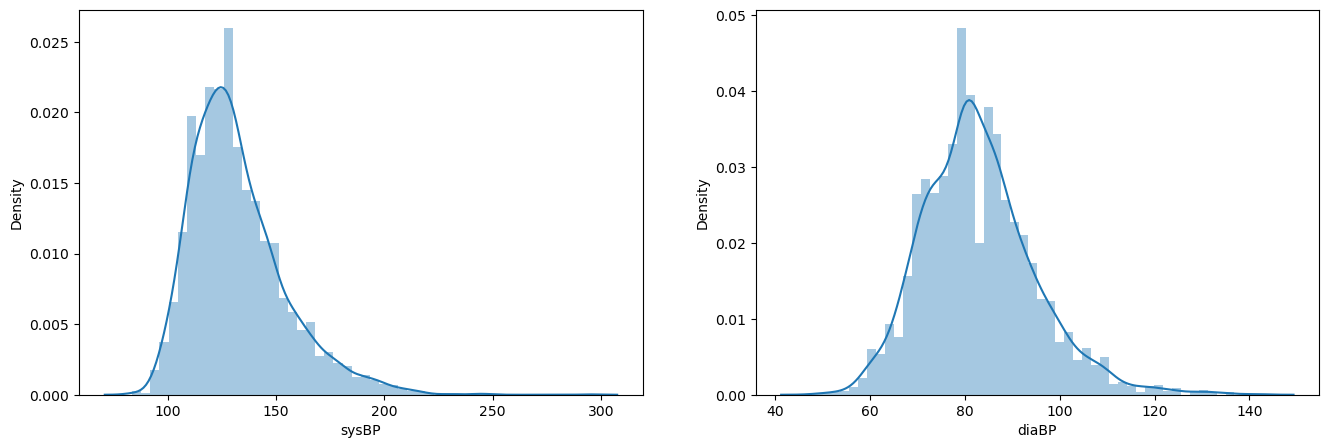

In [18]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(data['sysBP'])

plt.subplot(1,2,2)
sns.distplot(data['diaBP'])
plt.show()

C:\Users\Jeewanshu Gaur\AppData\Local\Temp\ipykernel_5092\2536525553.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['BMI'])
D:\Users\Jeewanshu Gaur\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jeewanshu Gaur\AppData\Local\Temp\ipykernel_5092\2536525553.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function w

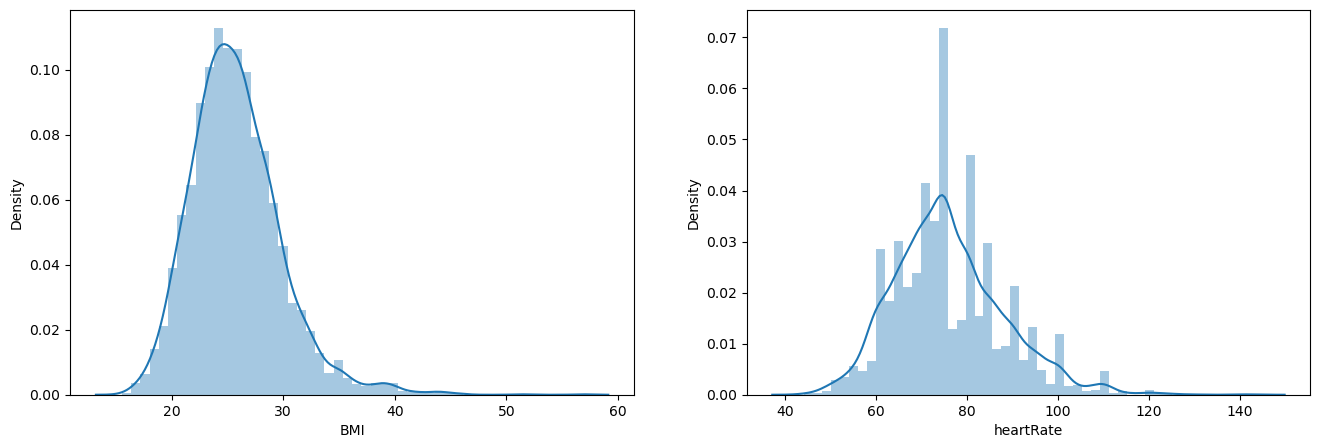

In [19]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(data['BMI'])

plt.subplot(1,2,2)
sns.distplot(data['heartRate'])
plt.show()

C:\Users\Jeewanshu Gaur\AppData\Local\Temp\ipykernel_5092\110757058.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['glucose'])
D:\Users\Jeewanshu Gaur\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


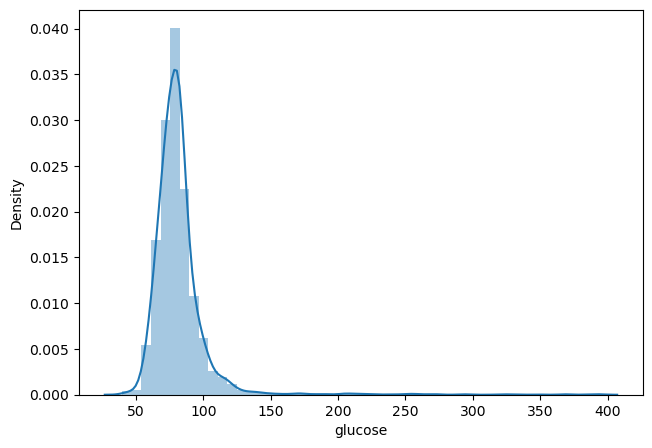

In [20]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(data['glucose'])
plt.show()

In [21]:
data.max()

male                 1.0
age                 70.0
education            4.0
currentSmoker        1.0
cigsPerDay          70.0
BPMeds               1.0
prevalentStroke      1.0
prevalentHyp         1.0
diabetes             1.0
totChol            600.0
sysBP              295.0
diaBP              142.5
BMI                 56.8
heartRate          143.0
glucose            394.0
TenYearCHD           1.0
dtype: float64

In [22]:
data.min()

male                 0.00
age                 32.00
education            1.00
currentSmoker        0.00
cigsPerDay           0.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         0.00
diabetes             0.00
totChol            113.00
sysBP               83.50
diaBP               48.00
BMI                 15.54
heartRate           44.00
glucose             40.00
TenYearCHD           0.00
dtype: float64

In [23]:
upper_limit = data['totChol'].mean() + 3 * data['totChol'].std()
lower_limit = data['totChol'].mean() - 3 * data['totChol'].std()

In [24]:
data['totChol'] = np.where(
    data['totChol'] > upper_limit,
    upper_limit,
    np.where(
        data['totChol'] < lower_limit,
        lower_limit,
        data['totChol']
    )
)

In [25]:
upper_limit

368.67981471458575

In [26]:
lower_limit

104.56121864382911

In [27]:
data['totChol'].describe()

count    3987.000000
mean      236.397782
std        43.088221
min       113.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       368.679815
Name: totChol, dtype: float64

In [28]:
data['sysBP'].skew()

1.1509819067049927

In [29]:
percentile25 = data['sysBP'].quantile(0.25)
percentile75 = data['sysBP'].quantile(0.75)
iqr = percentile75 - percentile25

In [30]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [31]:
data = data[data['sysBP'] < upper_limit]

<Axes: >

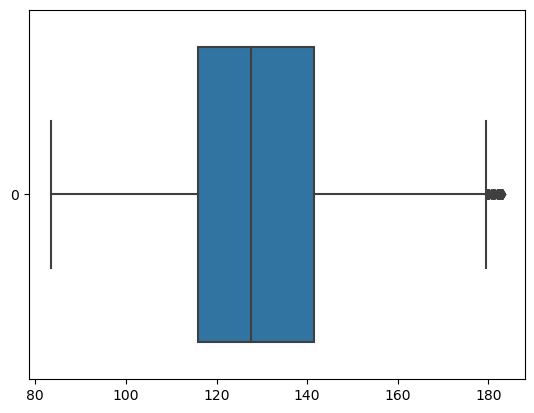

In [32]:
sns.boxplot(data['sysBP'] , orient = 'h')

In [33]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000
mean,0.439617,49.217481,1.992759,0.496250,9.135247,0.024050,0.005172,0.289372,0.022757,235.776125,130.153995,82.082234,25.662144,75.728730,81.407601,0.141195
std,0.496405,8.452327,1.024000,0.500051,11.960535,0.153223,0.071739,0.453529,0.149146,42.761779,18.635225,10.890366,3.924209,11.992781,20.984223,0.348267
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,116.000000,74.000000,23.010000,68.000000,72.000000,0.000000
50%,0.000000,48.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,127.500000,81.000000,25.310000,75.000000,79.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,141.500000,88.500000,27.920000,82.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,368.679815,183.000000,130.000000,45.800000,143.000000,394.000000,1.000000


In [34]:
data.shape

(3867, 16)

In [35]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


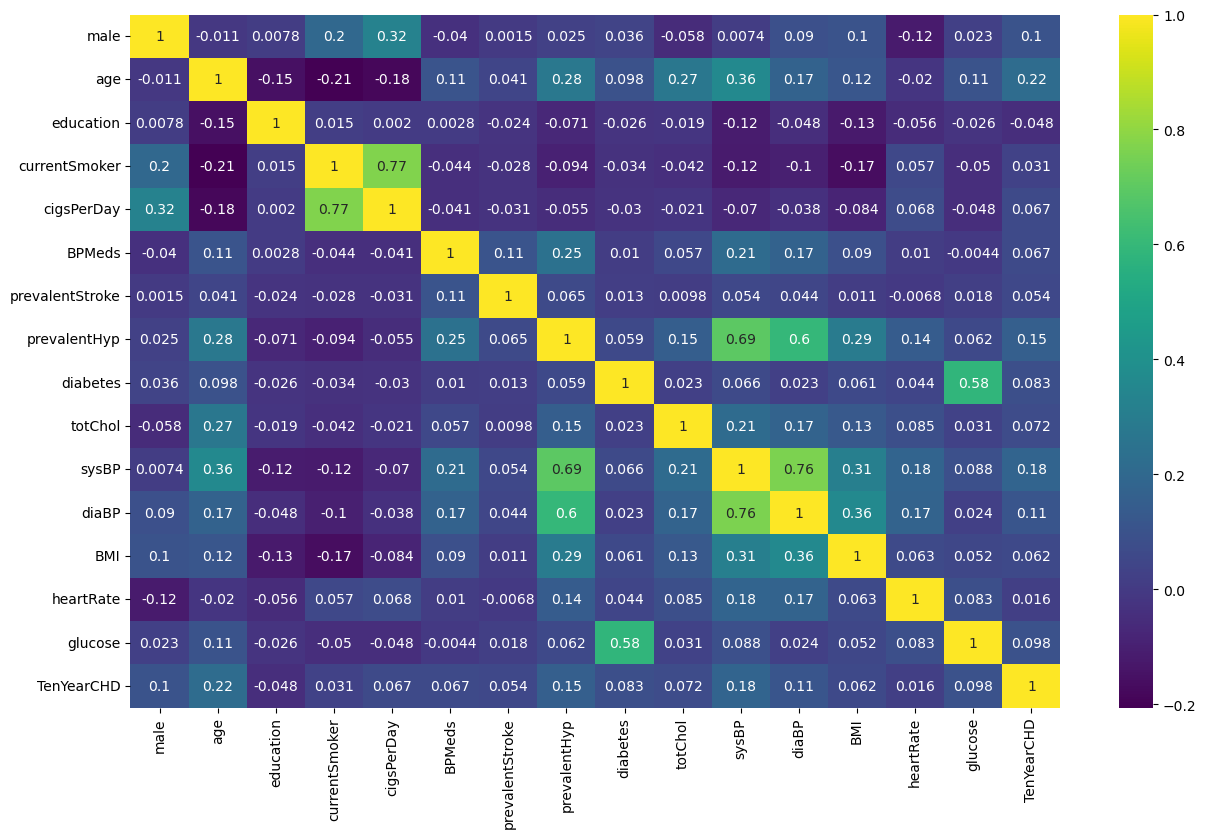

In [36]:
plt.figure(figsize = (15,9))
sns.heatmap(data.corr() , annot=True , cmap = 'viridis')
plt.show()

In [37]:
data.drop(columns=['education'] , inplace = True)

In [38]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [39]:
data['BMI'].min()

15.54

In [40]:
data['BMI'] = data['BMI'].clip(lower=15.54, upper=45)

In [41]:
data['BMI'].max()

45.0

In [42]:
data['BMI'].describe()

count    3867.000000
mean       25.661733
std         3.922140
min        15.540000
25%        23.010000
50%        25.310000
75%        27.920000
max        45.000000
Name: BMI, dtype: float64

<Axes: >

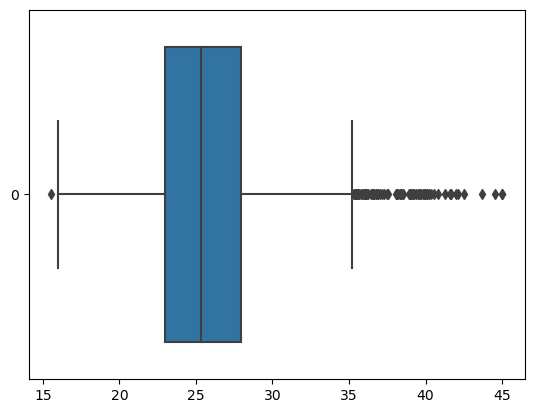

In [43]:
sns.boxplot(data['BMI'] , orient = 'h')

In [44]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[ 1.12902873, -1.20899287, -0.99252856, ...,  0.35619944,
        -0.21007075, -0.40547295],
       [-0.88571705, -0.38071143, -0.99252856, ...,  1.60711358,
        -0.25773176, -0.40547295],
       [ 1.12902873, -0.14405959,  1.00752769, ..., -0.06077193,
        -0.54369783, -0.40547295],
       ...,
       [ 1.12902873,  0.21091817,  1.00752769, ..., -0.89471469,
        -0.63901985, -0.40547295],
       [-0.88571705, -0.61736327,  1.00752769, ...,  0.8565651 ,
         0.02664974, -0.40547295],
       [-0.88571705,  0.32924409, -0.99252856, ...,  0.35619944,
         1.21975961, -0.40547295]])

In [45]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [46]:
x = data.drop('TenYearCHD' , axis = 1)
y = data['TenYearCHD']

In [47]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 42)

In [48]:
LR = LogisticRegression(max_iter=10000)
LR.fit(x_train , y_train)

LogisticRegression(max_iter=10000)

In [49]:
y_pred = LR.predict(x_test)

In [50]:
accuracy_score(y_test , y_pred)

0.8500517063081696

In [51]:
confusion_matrix(y_test , y_pred)

array([[813,   3],
       [142,   9]], dtype=int64)

In [52]:
df = pd.DataFrame({'y_test' : y_test , 'y_pred' : y_pred})
print(df)

      y_test  y_pred
2393       0       0
1551       0       0
2720       0       0
1741       1       0
1039       0       0
...      ...     ...
2793       1       0
2391       0       0
2220       0       0
3884       1       0
3986       0       0

[967 rows x 2 columns]
